In [1]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
    
import dsa
from dsa import *
from models import mlp
import pickle
from sklearn.model_selection import train_test_split

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [2]:
def make_dataset(X, Y, f):
    x = tf.data.Dataset.from_tensor_slices(X)
    y = tf.data.Dataset.from_tensor_slices(Y)
    x = x.map(f)
    xy = tf.data.Dataset.zip((x, y))
    xy = xy.shuffle(10000)
    return xy

df = pd.read_excel('../datasets/credit-card.xls', header=1, index_col=0).sample(frac=1)
x = df.drop(columns=["default payment next month"]).to_numpy()
x = (x - np.min(x, axis=0))/(np.max(x, axis=0) - np.min(x, axis=0))
y = df["default payment next month"].to_numpy().reshape((len(x), 1)).astype("float32")

aux_target_ratio = 0.2

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=aux_target_ratio/(aux_target_ratio+1), random_state=42)

target_ds = make_dataset(x_train, y_train, lambda t: t)
aux_ds = make_dataset(x_test, y_test, lambda t: t)

2022-04-05 18:46:18.385428: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-04-05 18:46:18.385502: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: xgpd6
2022-04-05 18:46:18.385519: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: xgpd6
2022-04-05 18:46:18.385681: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.103.1
2022-04-05 18:46:18.385735: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 470.103.1
2022-04-05 18:46:18.385748: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 470.103.1
2022-04-05 18:46:18.386629: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in per

In [3]:
credit_dsa = {}
log_credit_dsa = {}

for alpha1 in [100]:
    make_f, make_g, make_e, make_d, make_c = mlp.make_mlp(attr_num=23, class_num=2, split=3, units=64, ed_act="relu")
    credit_dsa[alpha1] = dsa(target_ds=target_ds, aux_ds=aux_ds)
    print("============================")
    print("======alpha1 is {}======".format(alpha1))
    print("============================")
    log_credit_dsa[alpha1] = credit_dsa[alpha1].dsa_attack(
        make_f=make_f,
        make_g=make_g,
        lr=0.001,
        loss_fn=tf.keras.losses.BinaryCrossentropy(),
        acc_fn=tf.keras.metrics.BinaryAccuracy(),
        batch_size=32,
        iterations=10000,
        make_e=make_e,
        make_d=make_d,
        make_c=make_c,
        lr_e=0.00001, # learning rate of the encoder/decoder/critic is set to be smaller
        lr_d=0.00001,
        lr_c=0.0001,
        alpha1=alpha1,
        verbose=True,
        log_freq=500)

======alpha1 is 100======
Iteration 500, train accuracy: 0.7566062464118004, average attack MSE: 0.1465394806265831
Iteration 1000, train accuracy: 0.7753342628479004, average attack MSE: 0.13774700662493705
Iteration 1500, train accuracy: 0.7760345997810364, average attack MSE: 0.13097005574405193
Iteration 2000, train accuracy: 0.7770894051790237, average attack MSE: 0.12169772988557816
Iteration 2500, train accuracy: 0.7771293139457702, average attack MSE: 0.10676908795535564
Iteration 3000, train accuracy: 0.7774675096273422, average attack MSE: 0.08981723767518997
Iteration 3500, train accuracy: 0.7773659290075302, average attack MSE: 0.07299924401938915
Iteration 4000, train accuracy: 0.7775671882629395, average attack MSE: 0.05832751407474279
Iteration 4500, train accuracy: 0.7773726189136505, average attack MSE: 0.04676962922513485
Iteration 5000, train accuracy: 0.7776503952741622, average attack MSE: 0.03809407889097929
Iteration 5500, train accuracy: 0.7775730451345444, aver

In [6]:
for alpha1 in [200,500,1000]:
    make_f, make_g, make_e, make_d, make_c = mlp.make_mlp(attr_num=23, class_num=2, split=3, units=64, ed_act="relu")
    credit_dsa[alpha1] = dsa(target_ds=target_ds, aux_ds=aux_ds)
    print("============================")
    print("======alpha1 is {}======".format(alpha1))
    print("============================")
    log_credit_dsa[alpha1] = credit_dsa[alpha1].dsa_attack(
        make_f=make_f,
        make_g=make_g,
        lr=0.001,
        loss_fn=tf.keras.losses.BinaryCrossentropy(),
        acc_fn=tf.keras.metrics.BinaryAccuracy(),
        batch_size=32,
        iterations=10000,
        make_e=make_e,
        make_d=make_d,
        make_c=make_c,
        lr_e=0.00001, # learning rate of the encoder/decoder/critic is set to be smaller
        lr_d=0.00001,
        lr_c=0.0001,
        alpha1=alpha1,
        verbose=True,
        log_freq=500)

======alpha1 is 200======
Iteration 500, train accuracy: 0.7568405917882919, average attack MSE: 0.1457123501300812
Iteration 1000, train accuracy: 0.7766794844865799, average attack MSE: 0.13967821243405343
Iteration 1500, train accuracy: 0.7763818240165711, average attack MSE: 0.13124394573271275
Iteration 2000, train accuracy: 0.7776328967809677, average attack MSE: 0.11939589218795299
Iteration 2500, train accuracy: 0.7774776171445846, average attack MSE: 0.10489792749285698
Iteration 3000, train accuracy: 0.7775399364233017, average attack MSE: 0.08915045447647571
Iteration 3500, train accuracy: 0.7776816012859344, average attack MSE: 0.07415494754910469
Iteration 4000, train accuracy: 0.7776330837011337, average attack MSE: 0.06082098460942507
Iteration 4500, train accuracy: 0.7776713509559632, average attack MSE: 0.04860358376055956
Iteration 5000, train accuracy: 0.7777070953845978, average attack MSE: 0.03993737767636776
Iteration 5500, train accuracy: 0.7775254564285279, aver

In [7]:
with open('log/credit-dsa-decor.pkl', 'wb') as f:
    pickle.dump(log_credit_dsa, f)

In [8]:
with open('log/credit-dsa.pkl', 'rb') as f:
    log_credit_dsa[0] = pickle.load(f)[3]

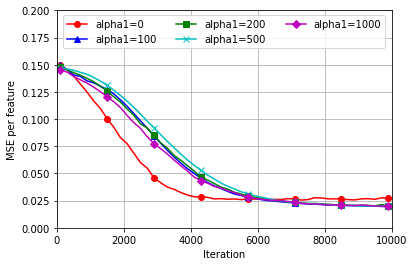

In [23]:
from matplotlib.pyplot import figure
# figure(figsize=(6.4,4.8))
log_freq = 200
# plt.yscale('logit')
plt.xlim([0,10000])
plt.ylim([0,0.2])
plt.grid()

sampled_loss = {}
sampled_fsha_loss = {}

for alpha1 in [0,100,200,500,1000]:
    sampled_loss[alpha1] = [sum(log_credit_dsa[alpha1][:,2][i*log_freq:(i+1)*log_freq])/log_freq for i in range(int(len(log_credit_dsa[alpha1][:,0])/log_freq))]
ran = [i * log_freq + log_freq/2 for i in range(int(10000/log_freq))]
plt.ylabel('MSE per feature')
plt.xlabel('Iteration')
plt.plot(ran, sampled_loss[0], 'ro-', ran, sampled_loss[100], 'b^-', ran, sampled_loss[200], 'gs-', ran, sampled_loss[500], 'cx-', ran, sampled_loss[1000], 'mD-', markevery=7)
# ax2=plt.gca().twinx()
# ax2.plot(ran, sampled_acc[2], 'ro-', ran, sampled_acc[3], 'b^-', ran, sampled_acc[4], 'gs-', markevery=7)
plt.legend(["alpha1=0", "alpha1=100", "alpha1=200", "alpha1=500", "alpha1=1000"], loc='upper center', ncol=3)
plt.savefig("fig/credit-decor.pdf", bbox_inches='tight')